# Question 1-4

## Importing libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

### Ploting the clusters in of first two attributes

In [2]:
# Visualising the clusters
def visualize(X, clusters):
    plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.title('Clusters of customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

### Dendrogram

In [3]:
# Using the dendrogram to find the optimal number of clusters
def dendrogram(X):
    dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

### Piechart plotter


In [4]:
def pieplotter(labels, sizes):
    plt.figure(num=None, figsize=(6, 4), dpi=150, facecolor='c', edgecolor='k')
    
    colors = ['lightcoral','gold', 'yellowgreen','lightskyblue', 'red','blue']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, 100*s/sum(sizes)) for l, s in zip(labels, sizes)])
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

### Reading the data set

In [5]:
# Importing the dataset
dataSet = pd.read_csv("./../output_data/q-1-1_a_linear.csv")
Class = "xAttack"
X = dataSet.iloc[:,:-1].values

In [6]:
X

array([[ 0.00000000e+00,  7.56415710e-01,  1.44824627e+00, ...,
         2.58068225e-01, -4.70689824e-01, -3.93873871e-02],
       [ 1.00000000e+00, -3.18537870e-01,  3.99413534e-01, ...,
        -1.64394836e+00,  1.98723003e+00,  9.06077912e-01],
       [ 2.00000000e+00,  6.08745751e-01,  1.51918151e+00, ...,
         4.03279661e-01, -4.18085870e-01,  1.50767595e-02],
       ...,
       [ 2.49950000e+04,  1.90469747e+00, -1.36036669e+00, ...,
        -9.33988526e+00,  1.10118985e+01, -1.10554321e+01],
       [ 2.49960000e+04,  2.19467358e+00,  2.28388771e+00, ...,
         2.02095732e+00, -6.61930722e-01,  1.44369583e-02],
       [ 2.49970000e+04, -1.02371568e+00, -2.62763109e+00, ...,
        -5.93051162e-01, -1.89931164e-01,  1.05619331e+00]])

### setting parameters

In [7]:
K = 5

In [8]:
# dendrogram(X)

### AgglomerativeClustering using sklearn

In [9]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'single')
clusters = hc.fit_predict(X)

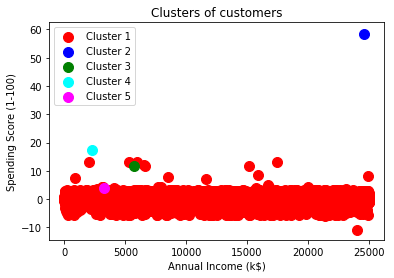

In [10]:
visualize(X,clusters)

In [11]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

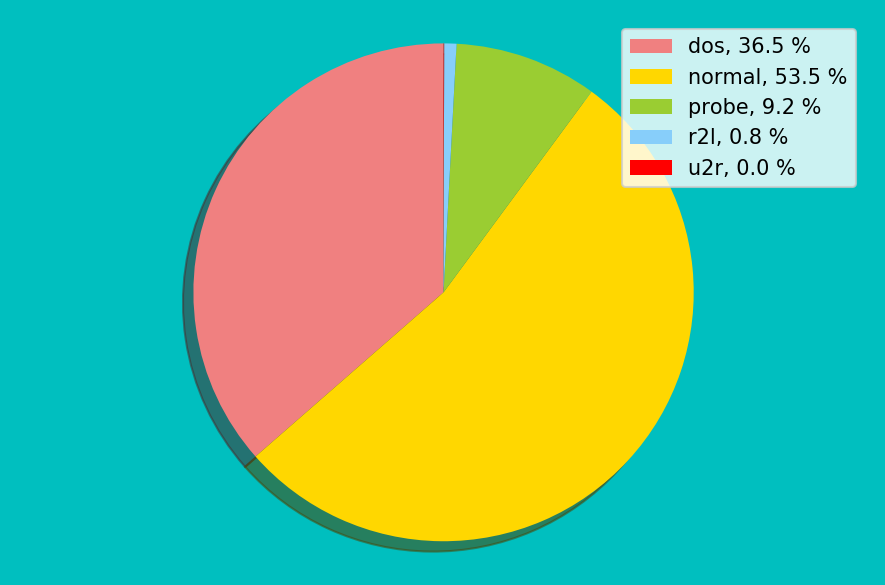

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 9114 13362  2311   197    10]


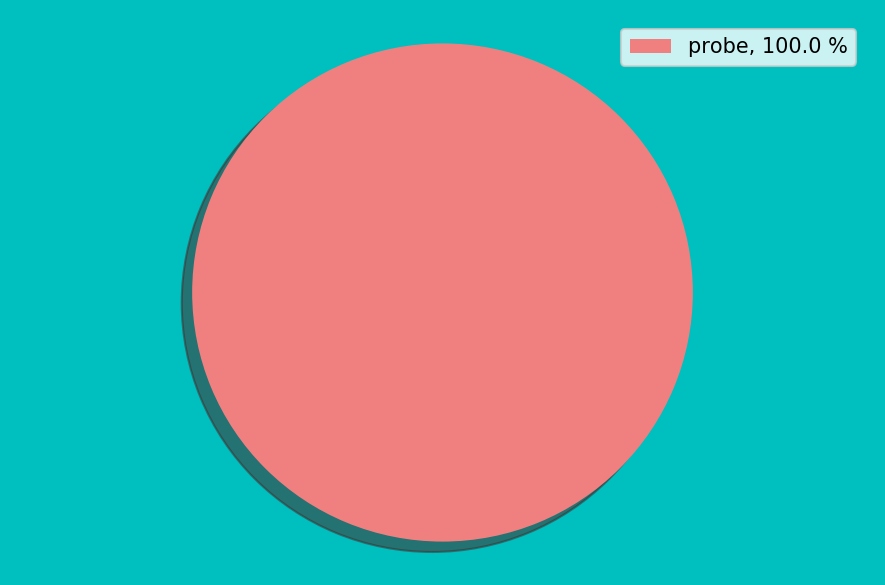

1 ['probe'] [1]


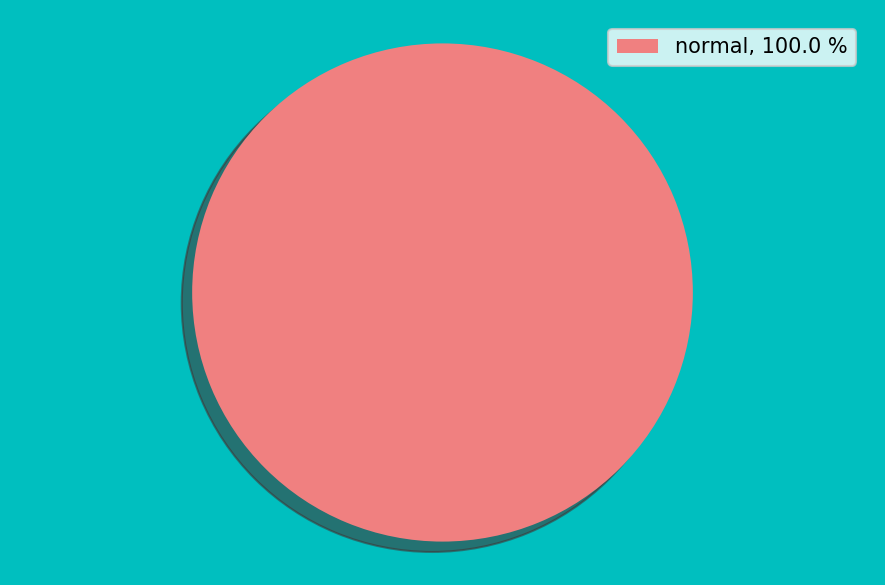

2 ['normal'] [1]


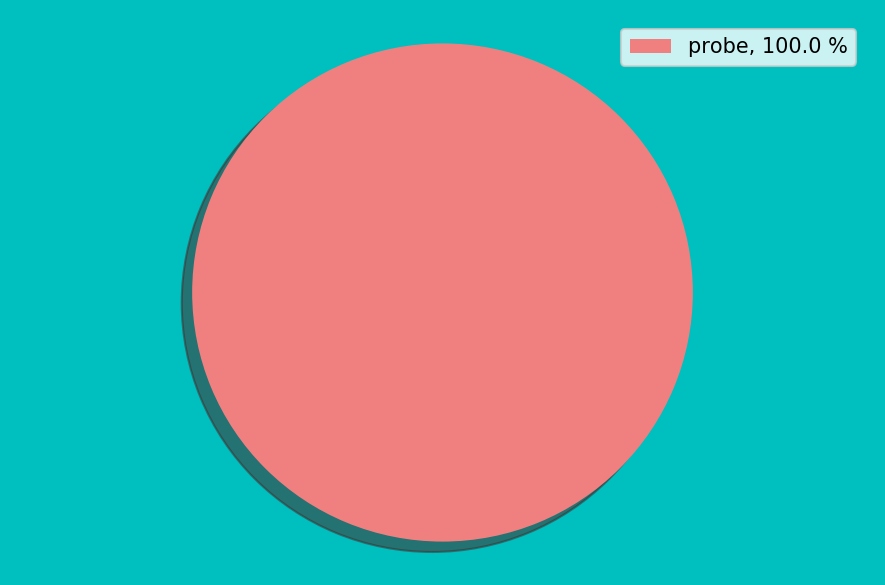

3 ['probe'] [1]


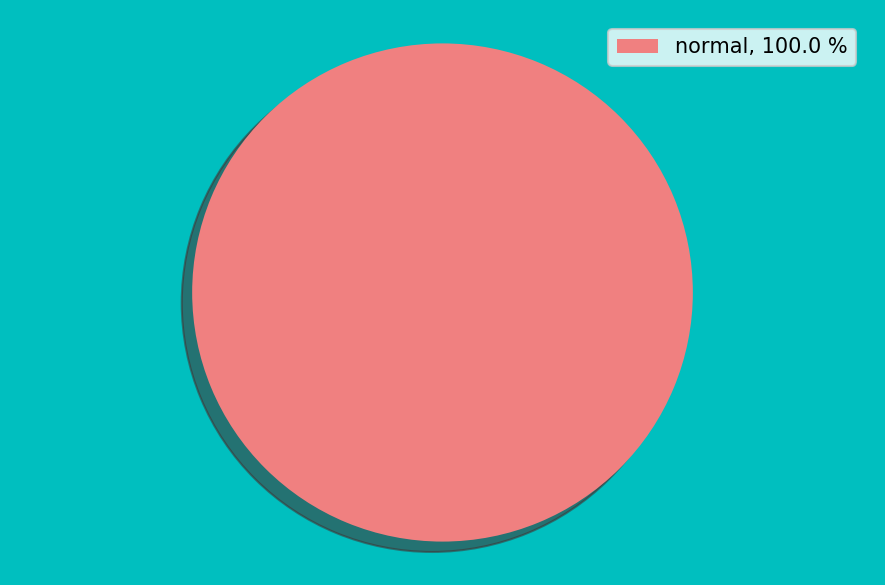

4 ['normal'] [1]


0.5346827746219698

In [12]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [13]:
# Importing the dataset
dataSet = pd.read_csv("./../output_data/q-1-1_b_sigmoid.csv")
Class = "xAttack"
X = dataSet.iloc[:,:-1].values

In [14]:
X

array([[0.00000000e+00, 5.08228096e-01, 5.46591043e-01, ...,
        5.44153985e-01, 6.07429560e-01, 5.59164054e-01],
       [1.00000000e+00, 5.06881415e-01, 5.45917771e-01, ...,
        5.42698900e-01, 6.04378614e-01, 5.51253614e-01],
       [2.00000000e+00, 5.08349752e-01, 5.46872599e-01, ...,
        5.44290106e-01, 6.07528402e-01, 5.59142231e-01],
       ...,
       [2.49950000e+04, 5.06550032e-01, 5.38457441e-01, ...,
        5.40107107e-01, 6.00612566e-01, 5.48811833e-01],
       [2.49960000e+04, 5.10520440e-01, 5.49641850e-01, ...,
        5.46349688e-01, 6.06283989e-01, 5.59094163e-01],
       [2.49970000e+04, 5.08931809e-01, 5.47273953e-01, ...,
        5.44380779e-01, 6.06715872e-01, 5.54310062e-01]])

### setting parameters

In [15]:
K = 5

In [16]:
# dendrogram(X)

### AgglomerativeClustering using sklearn

In [17]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'single')
clusters = hc.fit_predict(X)

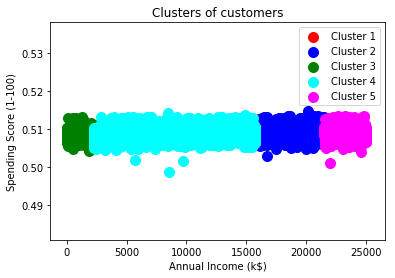

In [18]:
visualize(X,clusters)

In [19]:
clusters

array([2, 2, 2, ..., 4, 4, 4])

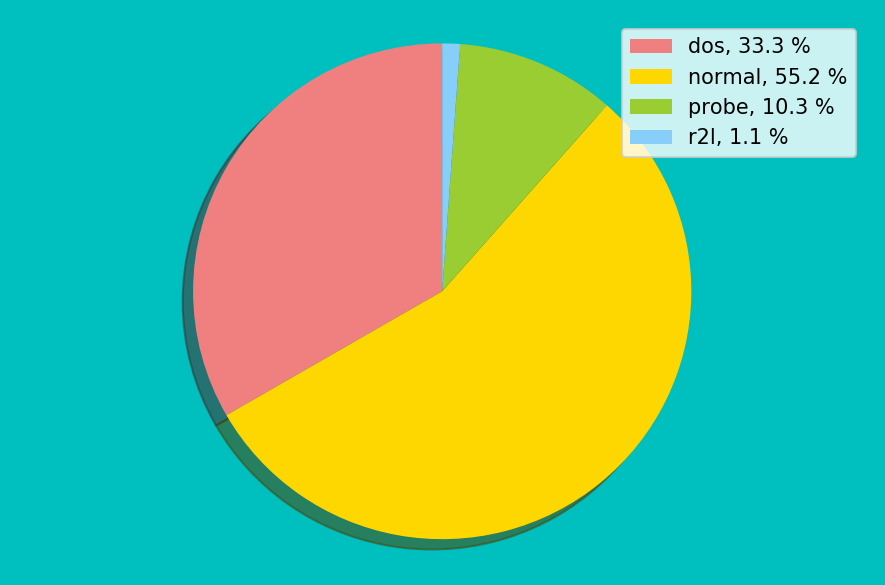

0 ['dos' 'normal' 'probe' 'r2l'] [58 96 18  2]


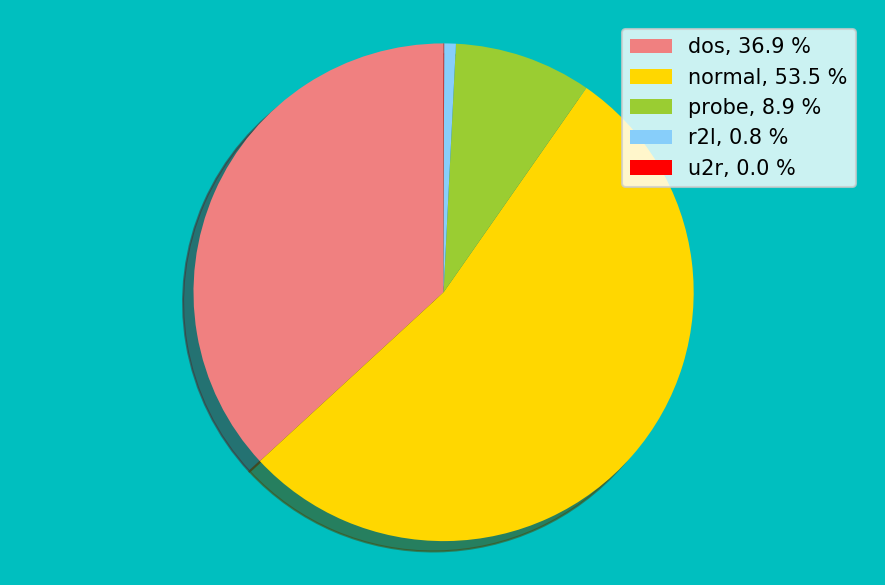

1 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [2063 2991  497   42    2]


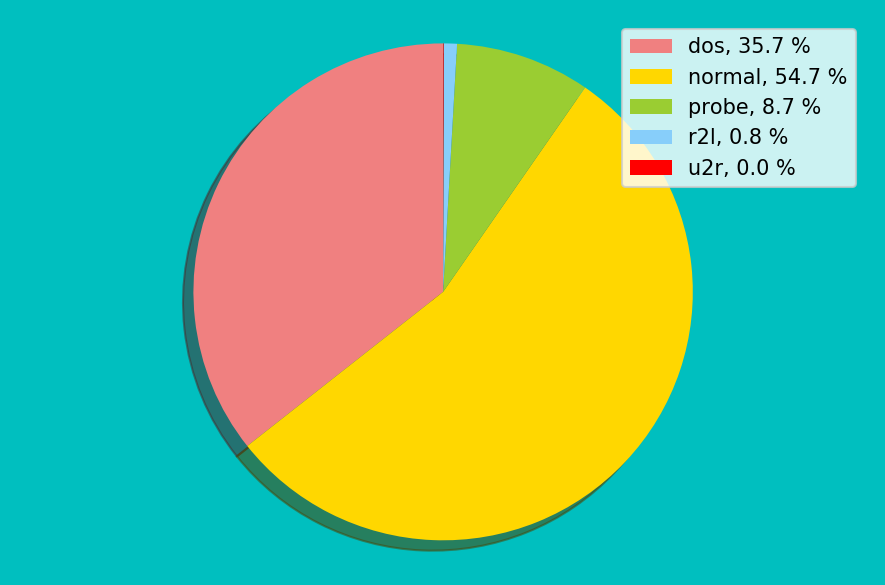

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 800 1228  196   19    1]


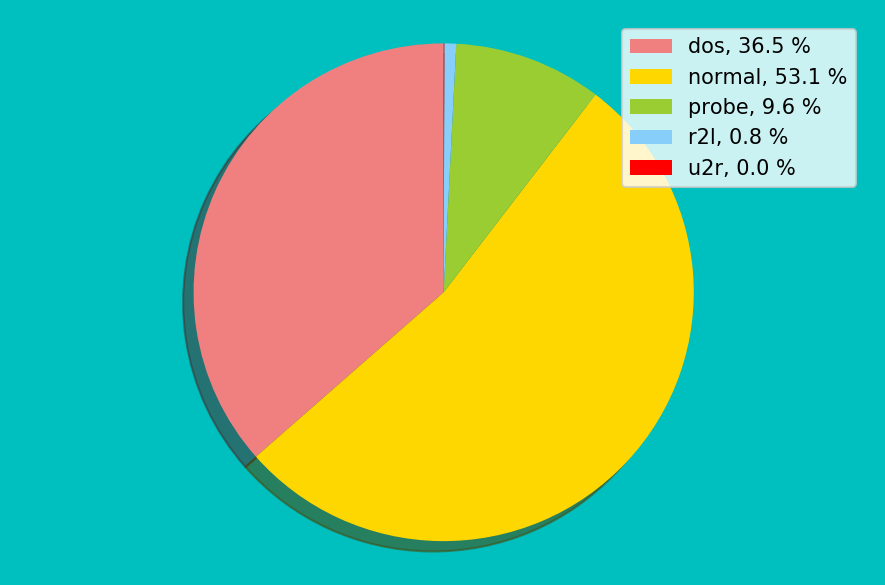

3 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [4933 7182 1295  103    6]


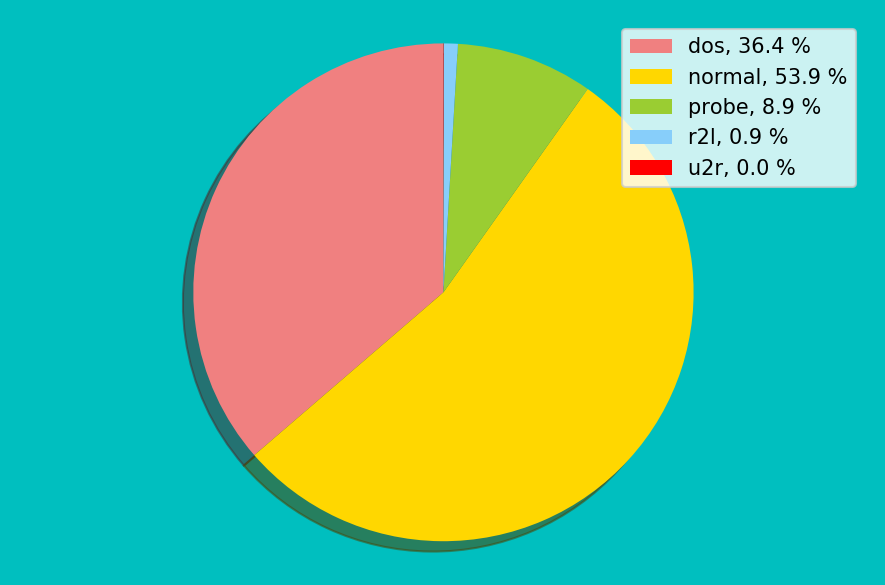

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1260 1867  307   31    1]


0.5346027682214577

In [20]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [21]:
# Importing the dataset
dataSet = pd.read_csv("./../output_data/q-1-1_b_ReLU.csv")
Class = "xAttack"
X = dataSet.iloc[:,:-1].values

In [22]:
X

array([[ 0.00000000e+00, -0.00000000e+00,  9.25737733e-01, ...,
         1.87004672e+00,  1.59219988e+00, -0.00000000e+00],
       [ 1.00000000e+00, -0.00000000e+00,  5.29170935e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.77050636e+00],
       [ 2.00000000e+00, -0.00000000e+00,  8.66734424e-01, ...,
         1.94893773e+00,  1.41024127e+00, -0.00000000e+00],
       ...,
       [ 2.49950000e+04, -0.00000000e+00, -0.00000000e+00, ...,
         9.32830425e+00,  7.17817069e+00, -0.00000000e+00],
       [ 2.49960000e+04, -0.00000000e+00, -0.00000000e+00, ...,
         1.53123221e+00,  4.07637229e+00, -0.00000000e+00],
       [ 2.49970000e+04,  3.22486237e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  3.13553422e+00]])

### setting parameters

In [23]:
K = 5

In [24]:
# dendrogram(X)

### AgglomerativeClustering using sklearn

In [25]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'single')
clusters = hc.fit_predict(X)

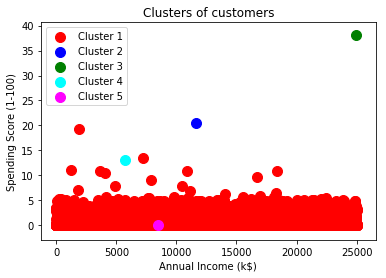

In [26]:
visualize(X,clusters)

In [27]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

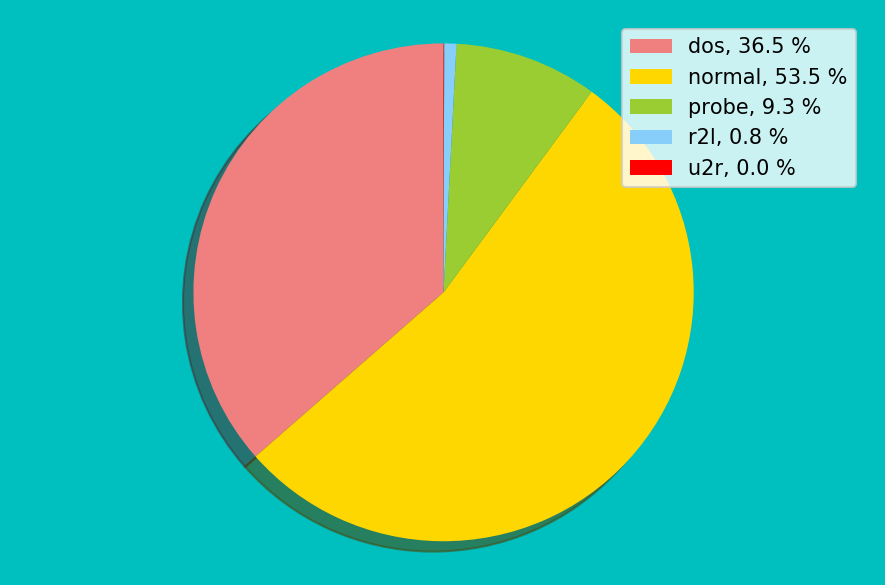

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 9114 13360  2313   197    10]


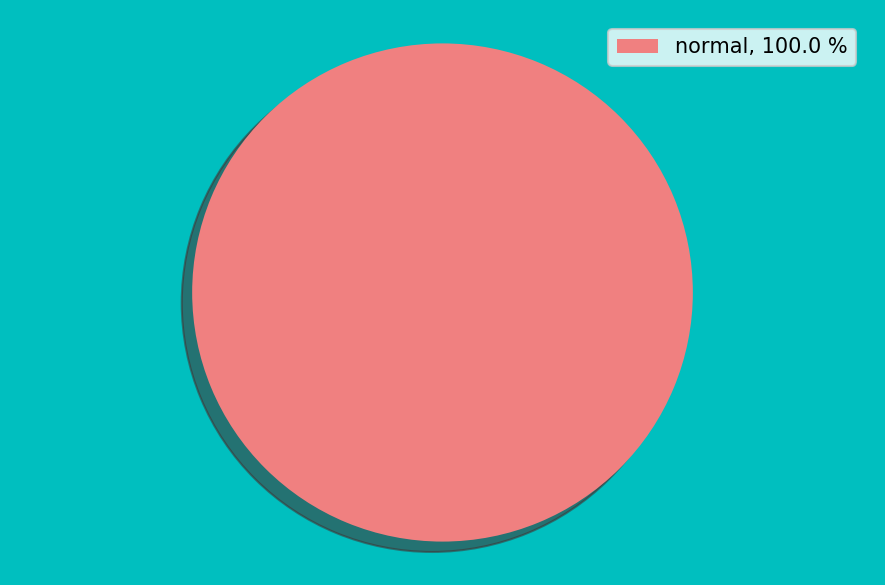

1 ['normal'] [1]


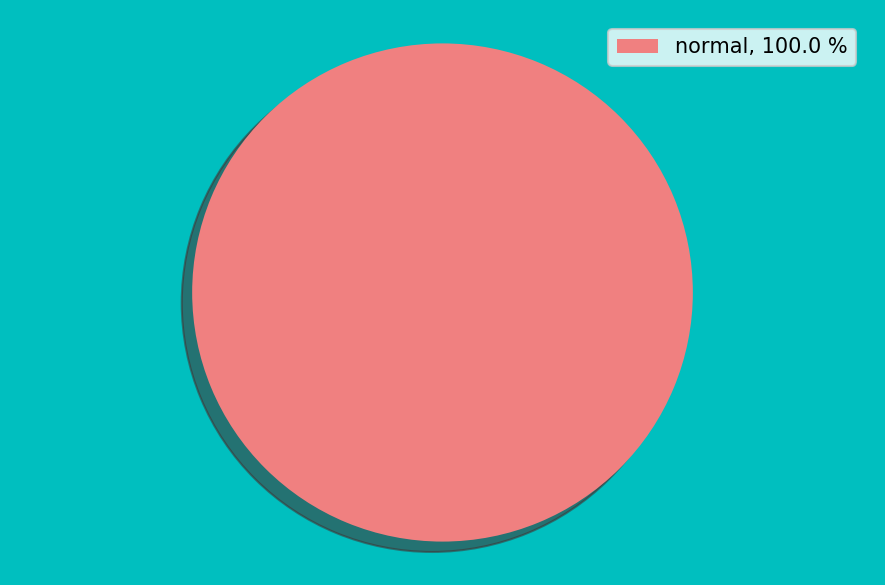

2 ['normal'] [1]


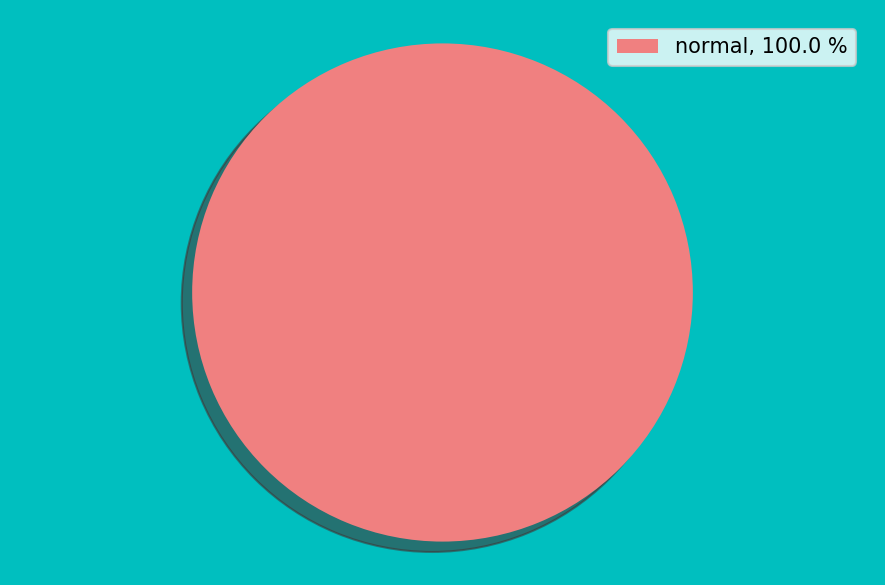

3 ['normal'] [1]


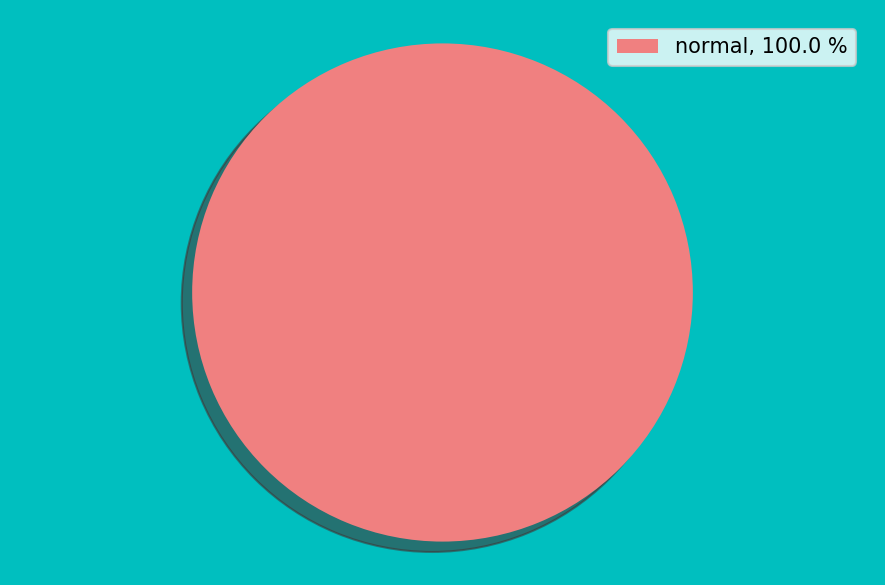

4 ['normal'] [1]


0.5346027682214577

In [28]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity

### Reading the data set

In [29]:
# Importing the dataset
dataSet = pd.read_csv("./../output_data/q-1-1_b_tanh.csv")
Class = "xAttack"
X = dataSet.iloc[:,:-1].values

In [30]:
X

array([[ 0.00000000e+00, -2.59245417e-01,  7.77198500e-01, ...,
        -5.80447042e-01, -1.57392199e-01,  4.41530738e-01],
       [ 1.00000000e+00,  4.23556927e-01, -7.08522621e-01, ...,
        -8.14737491e-01,  2.71808741e-01, -7.19249518e-01],
       [ 2.00000000e+00, -2.61423441e-01,  7.99423017e-01, ...,
        -6.42308386e-01, -1.35133217e-01,  4.55248043e-01],
       ...,
       [ 2.49950000e+04, -5.28697811e-01,  7.53103693e-01, ...,
         2.25819783e-01,  6.89020587e-01,  8.41908174e-01],
       [ 2.49960000e+04,  3.39661247e-01, -8.51831041e-01, ...,
         6.66733410e-01,  3.82269246e-02,  5.40825439e-01],
       [ 2.49970000e+04,  6.39629393e-01, -5.91933705e-01, ...,
         5.07318747e-01, -4.29634052e-01,  6.13446501e-01]])

### setting parameters

In [31]:
K = 5

In [32]:
# dendrogram(X)

### AgglomerativeClustering using sklearn

In [33]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'single')
clusters = hc.fit_predict(X)

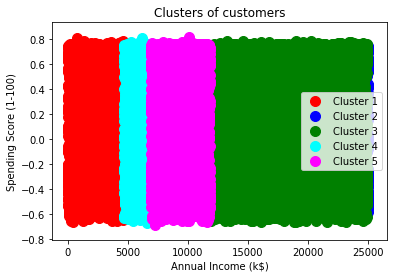

In [34]:
visualize(X,clusters)

In [35]:
clusters

array([0, 0, 0, ..., 1, 1, 1])

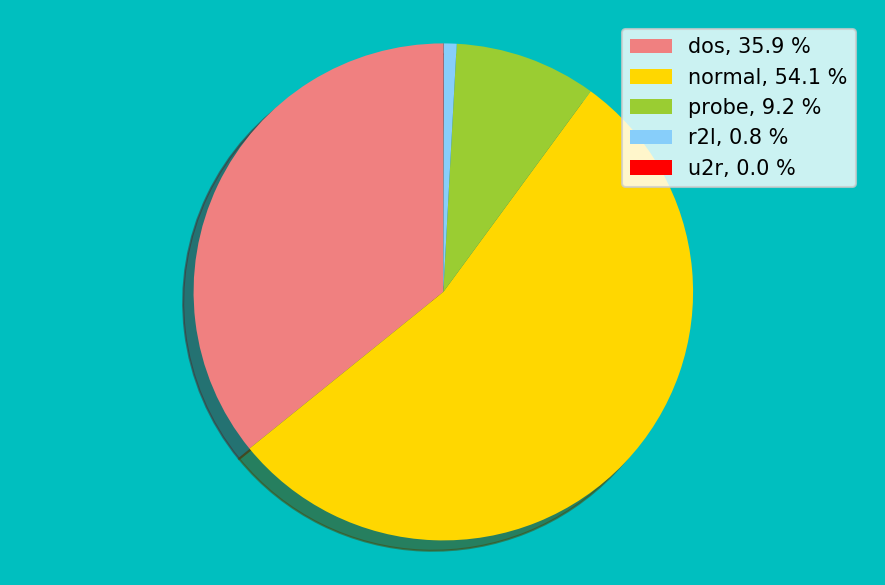

0 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1682 2538  431   39    1]


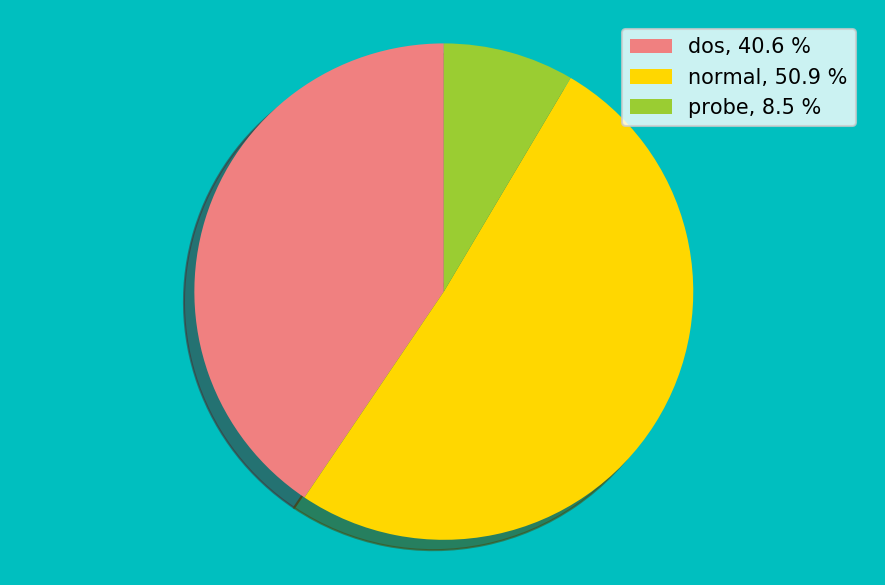

1 ['dos' 'normal' 'probe'] [43 54  9]


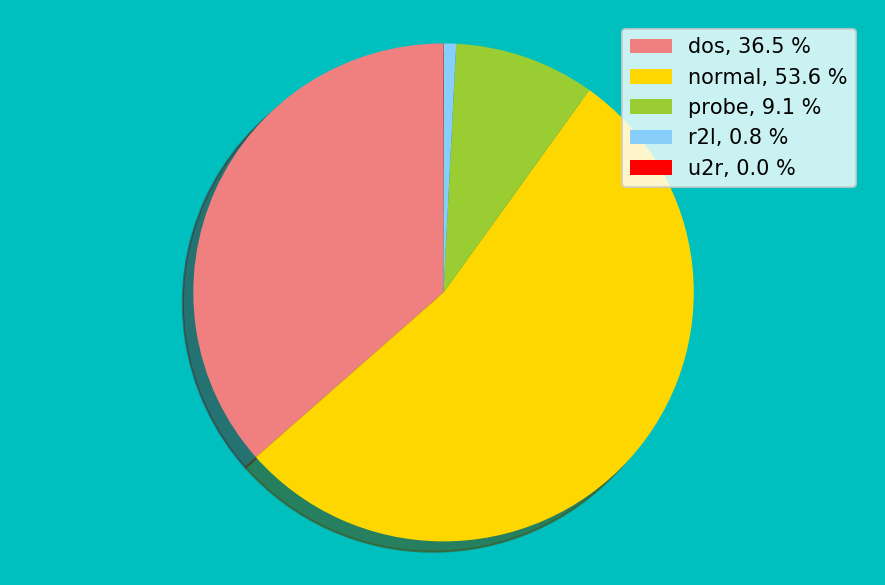

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [4773 7005 1188  103    3]


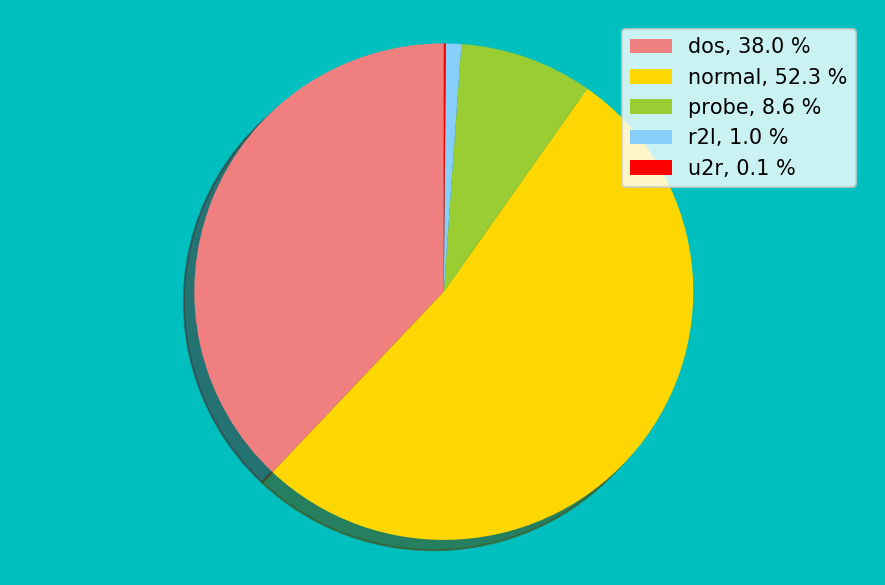

3 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 845 1164  192   22    3]


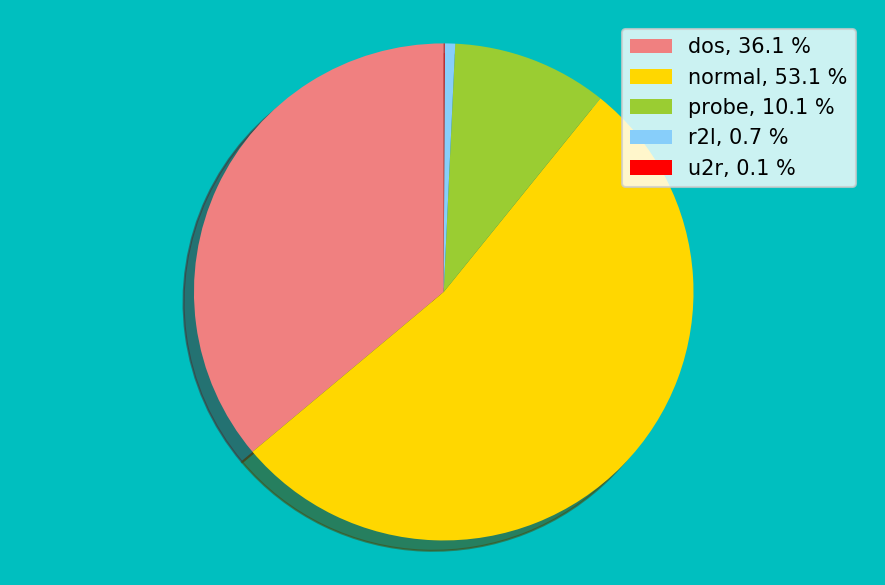

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [1771 2603  493   33    3]


0.5346027682214577

In [36]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity